In [1]:
# Setting up Notebook

% matplotlib inline

import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN, KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Anomaly Detection using Clustering

We will use [Wholesale Customer dataset](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers) which contains spending of wholesale distributors for different types of products.

In [3]:
# Load in the dataset
wholesale_data = pd.read_csv('wholesale_data.csv')

# Drop the first two columns which is used for classification
wholesale_data.drop(["Channel", "Region"], axis = 1, inplace = True)

# Preview the data
wholesale_data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


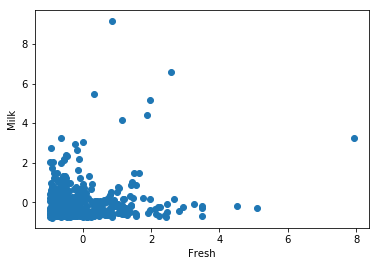

In [4]:
# Obtain the features
data = wholesale_data[wholesale_data.columns]
stscaler = StandardScaler().fit(data)
data = stscaler.transform(data)

plt.scatter(data[:,0], data[:,1])
plt.xlabel("Fresh")
plt.ylabel("Milk");

In [5]:
# This function will help us visualize the results.
def make_plot(df, axs, lbl, c, m):
    
    # Extract first dimension for given label
    xx = df[df.Label==lbl][['Fresh']]
    
    # Extract second dimension for given label
    yy = df[df.Label==lbl][['Milk']]
    
    # Plot first vs second dimension
    axs.scatter(xx, yy, color=c, marker=m, alpha =0.75, s=60, 
                label='Class={0}'.format(lbl))

### Use of DBSCAN model

In [6]:
def DBSCAN_model(data, epsilon, num_sample):
    '''    
    Parameters
    ----------
    data: A numpy.ndarray
    epsilon: A float specifying the maximum distance between two samples
    num_sample: A int specifying the minimum number of samples in the neighborhood
    
    Returns
    -------
    model: A sklearn.cluster.DBSCAN instance
    result: A numpy.ndarray of the labels
    '''
        
    # Define the model
    model = DBSCAN(eps=epsilon, min_samples=num_sample)
    
    # Fit the model to data
    model = model.fit(data)
    
    # Get the labels
    result = model.labels_

    return model, result

In [7]:
dbs_model, dbs_labels = DBSCAN_model(data, 0.5, 10)

In [8]:
dbs_model2, dbs_labels2 = DBSCAN_model(data, 0.25, 15)

In [9]:
dbs_model, dbs_labels = DBSCAN_model(data, 1, 10)

cnt =  Counter(np.sort(dbs_labels))

# Display the results of the clustering
print('DBSCAN Cluster membership.')
print(30*'-')
for itm in cnt:
    if itm < 0:
        print(f'Noise Cluster : {cnt[itm]:>4d} members')
    else:
        print(f'Cluster {itm}     : {cnt[itm]:>4d} members')

DBSCAN Cluster membership.
------------------------------
Noise Cluster :   54 members
Cluster 0     :  386 members


### Visualize

Text(0,0.5,'Milk')

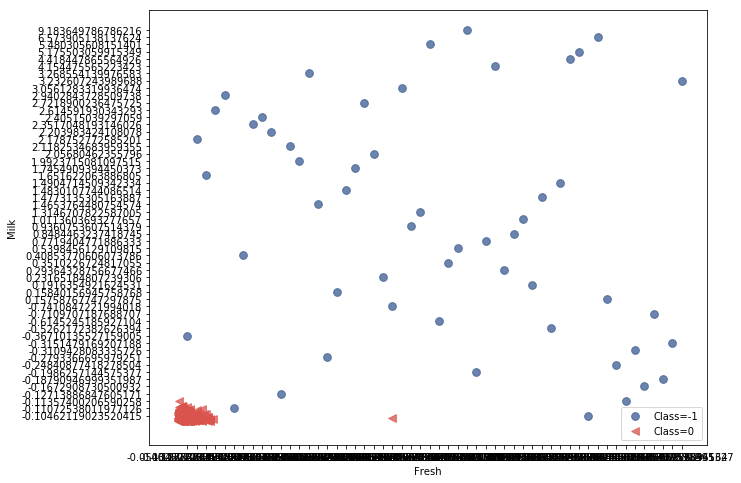

In [15]:
# Create Data Frame from clustered data, rename columns for simplicity
df = pd.DataFrame({'Fresh': data[:,0], 'Milk': data[:,1], 'Label': dbs_labels})

# Create figure
fig, axs = plt.subplots(figsize=(10, 8))

# Define color and markers for plots (assume only four clusters)
ca = [sns.xkcd_rgb['denim blue'], sns.xkcd_rgb['pale red'], 
      sns.xkcd_rgb['medium green'], sns.xkcd_rgb['dusty purple']]
ma = ['o', '<', '>', '^']

# Iterate through clusters
for idx, lbl in enumerate(np.unique(dbs_labels)):
    make_plot(df, axs, lbl, ca[idx], ma[idx])

# Decorate plot
axs.legend(loc=4)
axs.set_xlabel('Fresh')
axs.set_ylabel('Milk')

### K-means Model

In [16]:
def kmeans_model(data, k):
    '''    
    Parameters
    ----------
    data: A numpy.ndarray
    k: A int specifying the number of clusters
    
    Returns
    -------
    model: A sklearn.cluster.DBSCAN instance
    result: A numpy.ndarray of the labels
    '''
    # Define the model
    model = KMeans(n_clusters= k, random_state=0)
    
    # Fit the model to data
    model = model.fit(data)
    
    # Get the labels
    result = model.labels_    

    return model, result

In [17]:
kmeans_model1, kmeans_labels = kmeans_model(data, 2)

kmeans_model2, kmeans_labels2 = kmeans_model(data, 3)

In [18]:
kmeans_model1, kmeans_labels = kmeans_model(data, 2)

cnt =  Counter(np.sort(kmeans_labels))

# Display the results of the clustering
print('k-means Cluster membership.')
print(30*'-')
for itm in cnt:
    if itm < 0:
        print(f'Noise Cluster : {cnt[itm]:>4d} members')
    else:
        print(f'Cluster {itm}     : {cnt[itm]:>4d} members')

k-means Cluster membership.
------------------------------
Cluster 0     :   36 members
Cluster 1     :  404 members


### Visualize

Text(0,0.5,'Milk')

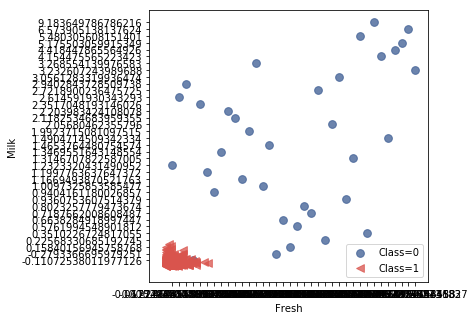

In [20]:
# Create Data Frame from clustered data, rename columns for simplicity
df = pd.DataFrame({'Fresh': data[:,0], 'Milk': data[:,1], 'Label': kmeans_labels})

# Create figure
fig, axs = plt.subplots(figsize=(5, 5))

# Define color and markers for plots (assume only four clusters)
ca = [sns.xkcd_rgb['denim blue'], sns.xkcd_rgb['pale red'], 
      sns.xkcd_rgb['medium green'], sns.xkcd_rgb['dusty purple']]
ma = ['o', '<', '>', '^']

# Iterate through clusters
for idx, lbl in enumerate(np.unique(kmeans_labels)):
    make_plot(df, axs, lbl, ca[idx], ma[idx])

# Decorate plot
axs.legend(loc=4)
axs.set_xlabel('Fresh')
axs.set_ylabel('Milk')
#sns.despine(offset=10, trim=True)